<a href="https://colab.research.google.com/github/beyzaturku/2209/blob/main/daylight_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/daylight_object_detection.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()

    folder_list = {"/".join(file.split('/')[:-1]) + '/' for file in file_list if '/' in file}

    print("ZIP İçindeki Tüm Klasörler:")
    for folder in sorted(folder_list):
        print(folder)

ZIP İçindeki Tüm Klasörler:
daylight_object_detection/
daylight_object_detection/images/
daylight_object_detection/images/train/
daylight_object_detection/images/val/
daylight_object_detection/labels/
daylight_object_detection/labels/train/
daylight_object_detection/labels/val/


In [ ]:
import zipfile
import os

# ZIP dosyasının tam yolunu belirt
zip_path = "/content/drive/MyDrive/daylight_object_detection.zip"
extract_path = "/content/drive/MyDrive/daylight_weather_object_detection"

# ZIP dosyasını aç ve içeriğini çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dosya {extract_path} konumuna çıkarıldı.")

Dosya /content/drive/MyDrive/daylight_weather_object_detection konumuna çıkarıldı.


In [ ]:
!pip install ultralytics
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.8/921.8 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [16]:
yaml_content = """train: /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/images/train
val: /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/images/val

nc: 4
names: ["car", "vehicle", "truck", "bus"]
"""

yaml_path = "/content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/data.yaml"

with open(yaml_path, "w") as file:
    file.write(yaml_content)

print(f"✅ data.yaml başarıyla kaydedildi: {yaml_path}")

✅ data.yaml başarıyla kaydedildi: /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/data.yaml


In [17]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model.train(
    data="/content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    project="/content/drive/MyDrive/daylight_weather_object_detection",
    name="yolov8_daylight_weather",
    save=True,
    save_period=5,
    val=True
)

Ultralytics 8.3.79 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=/content/drive/MyDrive/daylight_weather_object_detection, name=yolov8_daylight_weather, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, e

100%|██████████| 755k/755k [00:00<00:00, 19.9MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.9MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/labels/train... 3689 images, 81 backgrounds, 0 corrupt: 100%|██████████| 3689/3689 [00:46<00:00, 78.85it/s] 


train: New cache created: /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/labels/val... 923 images, 18 backgrounds, 0 corrupt: 100%|██████████| 923/923 [00:08<00:00, 108.72it/s]


val: New cache created: /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/labels/val.cache
Plotting labels to /content/drive/MyDrive/daylight_weather_object_detection/yolov8_daylight_weather/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/daylight_weather_object_detection/yolov8_daylight_weather
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.94G      1.553       1.67     0.9687        194        640: 100%|██████████| 231/231 [00:29<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:05<00:00,  5.17it/s]

                   all        923      16657      0.645      0.619      0.647      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.23G      1.371     0.9343     0.9223        226        640: 100%|██████████| 231/231 [00:27<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.66it/s]


                   all        923      16657      0.771      0.763      0.817      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.62G       1.32     0.8224     0.9115        356        640: 100%|██████████| 231/231 [00:26<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.45it/s]


                   all        923      16657      0.876      0.821      0.901      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.68G      1.264     0.7513     0.9003        257        640: 100%|██████████| 231/231 [00:26<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.96it/s]


                   all        923      16657      0.913      0.831      0.921      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.87G      1.228     0.6976     0.8937        193        640: 100%|██████████| 231/231 [00:26<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.52it/s]


                   all        923      16657      0.943       0.89      0.953      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.78G      1.187     0.6573     0.8866        338        640: 100%|██████████| 231/231 [00:26<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.89it/s]


                   all        923      16657      0.932      0.874      0.946      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       3.7G      1.166     0.6431     0.8829        289        640: 100%|██████████| 231/231 [00:26<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.61it/s]


                   all        923      16657      0.937       0.88      0.949      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.14G      1.154      0.631     0.8808        248        640: 100%|██████████| 231/231 [00:26<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.97it/s]

                   all        923      16657      0.944      0.916      0.969      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.87G       1.12     0.5977     0.8732        331        640: 100%|██████████| 231/231 [00:26<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.95it/s]


                   all        923      16657      0.937      0.922      0.961      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.62G      1.094     0.5811     0.8675        270        640: 100%|██████████| 231/231 [00:26<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.99it/s]

                   all        923      16657      0.954      0.922      0.972      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.99G      1.094     0.5816     0.8687        291        640: 100%|██████████| 231/231 [00:26<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.93it/s]

                   all        923      16657      0.951      0.925      0.973       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.82G      1.077     0.5661     0.8665        316        640: 100%|██████████| 231/231 [00:26<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.70it/s]


                   all        923      16657      0.963      0.926      0.974      0.731

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.23G      1.057     0.5526     0.8629        305        640: 100%|██████████| 231/231 [00:26<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.08it/s]

                   all        923      16657      0.961      0.933      0.977      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.67G      1.046     0.5457     0.8615        246        640: 100%|██████████| 231/231 [00:26<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.62it/s]

                   all        923      16657      0.964      0.946      0.982      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.77G      1.036      0.537     0.8601        203        640: 100%|██████████| 231/231 [00:26<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.73it/s]

                   all        923      16657      0.961      0.939      0.983      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.64G      1.028     0.5328     0.8581        281        640: 100%|██████████| 231/231 [00:26<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.74it/s]

                   all        923      16657      0.964      0.943      0.981      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.01G      1.011     0.5224     0.8555        274        640: 100%|██████████| 231/231 [00:26<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.96it/s]

                   all        923      16657      0.962      0.946      0.983      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.25G      1.008     0.5208     0.8543        288        640: 100%|██████████| 231/231 [00:26<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.87it/s]


                   all        923      16657      0.956       0.95      0.982      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.72G     0.9821     0.5041     0.8506        306        640: 100%|██████████| 231/231 [00:26<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.02it/s]

                   all        923      16657       0.97      0.941      0.983      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.67G     0.9811     0.5074     0.8512        250        640: 100%|██████████| 231/231 [00:26<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.72it/s]

                   all        923      16657      0.961       0.95      0.984      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       3.4G     0.9844     0.5059     0.8507        219        640: 100%|██████████| 231/231 [00:26<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.84it/s]

                   all        923      16657      0.966      0.954      0.986      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.47G     0.9679     0.4958     0.8467        318        640: 100%|██████████| 231/231 [00:26<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.04it/s]

                   all        923      16657      0.964      0.962      0.988      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.98G     0.9662     0.4934     0.8474        202        640: 100%|██████████| 231/231 [00:26<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.71it/s]

                   all        923      16657      0.973       0.96      0.988      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.56G     0.9511     0.4844     0.8452        334        640: 100%|██████████| 231/231 [00:26<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.83it/s]

                   all        923      16657      0.972       0.96      0.988      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.28G     0.9491     0.4856     0.8436        303        640: 100%|██████████| 231/231 [00:26<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.65it/s]

                   all        923      16657       0.97      0.956      0.988      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.97G     0.9404     0.4792     0.8444        320        640: 100%|██████████| 231/231 [00:26<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.06it/s]

                   all        923      16657      0.973      0.959      0.989      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.69G      0.934      0.476      0.842        310        640: 100%|██████████| 231/231 [00:26<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.63it/s]

                   all        923      16657      0.975      0.966       0.99      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.83G     0.9204     0.4673     0.8408        273        640: 100%|██████████| 231/231 [00:26<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.02it/s]

                   all        923      16657      0.979      0.961      0.989      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.07G     0.9145     0.4659     0.8383        255        640: 100%|██████████| 231/231 [00:26<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.65it/s]

                   all        923      16657      0.975      0.968      0.989      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.55G     0.9141     0.4652     0.8396        315        640: 100%|██████████| 231/231 [00:26<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.96it/s]

                   all        923      16657       0.98      0.965       0.99      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.29G     0.9077     0.4618      0.838        291        640: 100%|██████████| 231/231 [00:26<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.98it/s]

                   all        923      16657      0.974      0.968       0.99      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.09G     0.9025      0.459     0.8376        276        640: 100%|██████████| 231/231 [00:26<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.04it/s]

                   all        923      16657      0.978      0.964       0.99      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.91G     0.8948     0.4558     0.8364        466        640: 100%|██████████| 231/231 [00:26<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.05it/s]

                   all        923      16657      0.969      0.965      0.988      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.11G     0.8937     0.4544     0.8352        358        640: 100%|██████████| 231/231 [00:26<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.80it/s]

                   all        923      16657      0.975      0.965       0.99      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       3.5G     0.8809     0.4457     0.8337        365        640: 100%|██████████| 231/231 [00:26<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.96it/s]

                   all        923      16657      0.976      0.966      0.991      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       3.3G     0.8794      0.448     0.8334        316        640: 100%|██████████| 231/231 [00:26<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.83it/s]

                   all        923      16657      0.976      0.967      0.991       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.42G     0.8703     0.4435     0.8319        262        640: 100%|██████████| 231/231 [00:26<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.95it/s]

                   all        923      16657      0.975      0.967      0.991      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.34G     0.8661     0.4392     0.8325        190        640: 100%|██████████| 231/231 [00:26<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.65it/s]

                   all        923      16657      0.971      0.968      0.991      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.99G     0.8616     0.4376     0.8312        248        640: 100%|██████████| 231/231 [00:26<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.12it/s]

                   all        923      16657      0.974       0.97      0.991      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.42G     0.8556     0.4333     0.8312        261        640: 100%|██████████| 231/231 [00:26<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.02it/s]

                   all        923      16657      0.969      0.972       0.99      0.813


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.65G      0.824     0.4144     0.8267        139        640: 100%|██████████| 231/231 [00:25<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.98it/s]

                   all        923      16657      0.971      0.965       0.99      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.45G     0.8089     0.4061     0.8252        134        640: 100%|██████████| 231/231 [00:24<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.99it/s]

                   all        923      16657      0.975      0.968      0.991      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.66G     0.7997     0.4008     0.8252        179        640: 100%|██████████| 231/231 [00:24<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.59it/s]

                   all        923      16657      0.975      0.971      0.992      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.7G     0.7908     0.3974     0.8215        126        640: 100%|██████████| 231/231 [00:24<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.90it/s]

                   all        923      16657      0.975      0.969      0.992      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.8G     0.7808     0.3932     0.8224        189        640: 100%|██████████| 231/231 [00:24<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.97it/s]

                   all        923      16657      0.972      0.972      0.991      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.67G     0.7681     0.3866     0.8191        188        640: 100%|██████████| 231/231 [00:24<00:00,  9.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.93it/s]

                   all        923      16657       0.97      0.975      0.991      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       2.6G     0.7665     0.3849     0.8194        143        640: 100%|██████████| 231/231 [00:24<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.88it/s]

                   all        923      16657      0.972      0.973      0.992      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.47G     0.7533     0.3793     0.8183        174        640: 100%|██████████| 231/231 [00:24<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  7.05it/s]

                   all        923      16657      0.973      0.976      0.992       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.64G     0.7528     0.3785      0.819        135        640: 100%|██████████| 231/231 [00:24<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.90it/s]

                   all        923      16657      0.979       0.97      0.992      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.71G     0.7438     0.3758     0.8166        186        640: 100%|██████████| 231/231 [00:24<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  6.78it/s]

                   all        923      16657      0.979      0.969      0.992      0.834



50 epochs completed in 0.436 hours.
Optimizer stripped from /content/drive/MyDrive/daylight_weather_object_detection/yolov8_daylight_weather/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/daylight_weather_object_detection/yolov8_daylight_weather/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/daylight_weather_object_detection/yolov8_daylight_weather/weights/best.pt...
Ultralytics 8.3.79 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:06<00:00,  4.16it/s]


                   all        923      16657      0.979       0.97      0.992      0.834
                   car        885      15309      0.984      0.951      0.989      0.786
                 truck        445        858      0.983       0.97      0.993      0.822
                   bus        257        490      0.969      0.988      0.994      0.895
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/MyDrive/daylight_weather_object_detection/yolov8_daylight_weather


In [18]:
# Eğitilmiş modeli yükle
best_model = YOLO("/content/drive/MyDrive/daylight_weather_object_detection/yolov8_daylight_weather/weights/best.pt")

# Modelin performansını doğrulama setinde test et
metrics = best_model.val()
print(metrics)

Ultralytics 8.3.79 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/labels/val.cache... 923 images, 18 backgrounds, 0 corrupt: 100%|██████████| 923/923 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:11<00:00,  4.99it/s]


                   all        923      16657      0.979      0.969      0.992      0.836
                   car        885      15309      0.984      0.951      0.989      0.789
                 truck        445        858      0.983       0.97      0.993      0.826
                   bus        257        490       0.97      0.988      0.994      0.893
Speed: 0.2ms preprocess, 0.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2ac0337410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.

In [19]:
#!pip install ultralytics
import torch
from pathlib import Path
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

model_path = "/content/drive/MyDrive/daylight_weather_object_detection/yolov8_daylight_weather/weights/best.pt"
model = YOLO(model_path)

test_images_path = "/content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/images/val"
test_annotations_path = "/content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/labels/val"

results = model.predict(source=test_images_path, conf=0.1,iou=0.3, save=True, stream=True)

all_results = list(results)


image 1/923 /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/images/val/M0101_img000070.jpg: 352x640 14 cars, 1 truck, 1 bus, 59.8ms
image 2/923 /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/images/val/M0101_img000074.jpg: 352x640 14 cars, 1 truck, 1 bus, 7.6ms
image 3/923 /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/images/val/M0101_img000076.jpg: 352x640 14 cars, 1 truck, 1 bus, 7.7ms
image 4/923 /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/images/val/M0101_img000094.jpg: 352x640 15 cars, 1 truck, 7.2ms
image 5/923 /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/images/val/M0101_img000127.jpg: 352x640 15 cars, 1 truck, 7.7ms
image 6/923 /content/drive/MyDrive/daylight_weather_object_detection/daylight_object_detection/images/val/M0101_img000130.jpg: 352x640 15 cars, 1 truck, 7.5ms
image 7/923 /content/dr

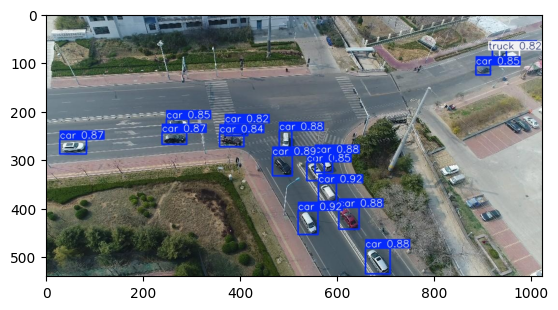

In [20]:
import matplotlib.pyplot as plt
# Test edilen bir görüntüyü görselleştir
image_path = '/content/runs/detect/predict/M0101_img000130.jpg'
img = plt.imread(image_path)
plt.imshow(img)
plt.show()

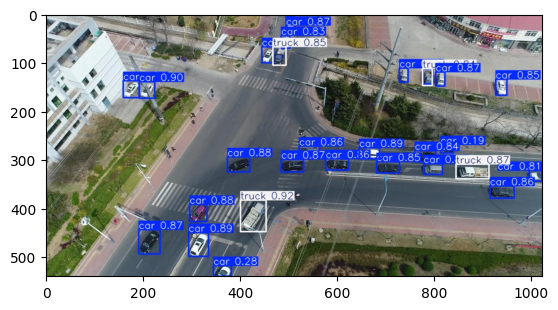

In [21]:
import matplotlib.pyplot as plt
# Test edilen bir görüntüyü görselleştir
image_path = '/content/runs/detect/predict/M1201_img000483.jpg'
img = plt.imread(image_path)
plt.imshow(img)
plt.show()

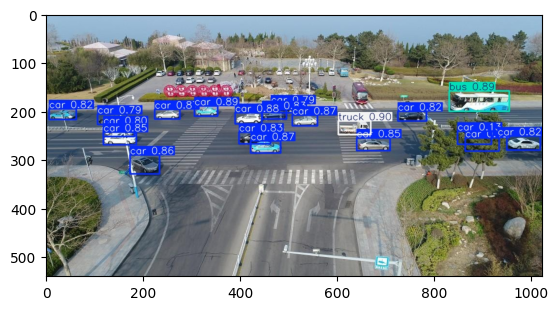

In [22]:
import matplotlib.pyplot as plt
# Test edilen bir görüntüyü görselleştir
image_path = '/content/runs/detect/predict/M1306_img000506.jpg'
img = plt.imread(image_path)
plt.imshow(img)
plt.show()